# Analyzing data using machine learning

If we collect information in large datasets, we could use several machine learning techniques to see if the data is predictable.  This way features, such as sensor readings, could be used to guess classification such as "room is occupied" or "room is unoccupied."

A dataset like this [exists](http://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+).  Let's take a look. 



In [34]:
import io
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
# Download data from archive dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00357/occupancy_data.zip"
with zipfile.ZipFile(io.BytesIO(requests.get(url).content)) as z:
    data = pd.read_csv(z.open('datatraining.txt'))

# if the zip contains only one file, use this:
# data = pd.read_csv(url, compression='zip')

In [19]:
data.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


We see the field names and five rows of data.  Which ones are features and which is the classifier?  Is the classifier binary (just 2 values)?  What does **humidity ratio** mean?  Let's see what the [data set description](http://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+) says about them:

* Date, pictures taken every minute
* Temperature, in Celsius 
* Relative Humidity, % 
* Light, in Lux 
* CO2, in ppm 
* Humidity Ratio, derived from temperature and relative humidity, in kgwater-vapor/kg-air 
* Occupancy, 0 or 1, 0 for not occupied, 1 for occupied status

Okay, so it looks like **date**, **temperature**, **relative humidity**, **light**, **carbon dioxide (CO2)**, and **humidity ratio** are the *features* and  **occupancy** is the *binary classifier* we are trying to guess.

Let's take a closer look at the dataset as a whole:

In [52]:
print("Total instances: ", len(data))

Total instances:  8143


In [53]:
data['Occupancy'].value_counts()/len(data)

0    0.78767
1    0.21233
Name: Occupancy, dtype: float64

The dataset has 8,143 *instances* (total number of samples).  Of this, 78.8% are for the **0** (unoccupied) *classification*.  This is important since it represents the *baseline accuracy* of the dataset.  In other words, a non-intelligent predictor that always guesses **0** would be right 78.8% of the time.  Our goal is to come up with a predictor that exceeds this value, hopefully by a lot.

In [49]:
data.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


Let's take a closer look at the features:

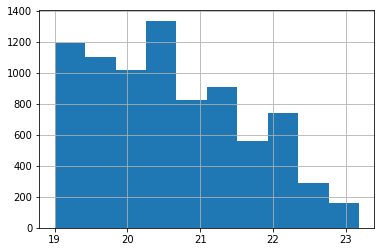

In [26]:
plt.figure()
data['Temperature'].hist()